In [1]:
import pandas as pd
import numpy as np
import sys
import sklearn
import io
import random

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


In [3]:
train_data = pd.read_csv("NSL_KDD_Train.csv", header=None, names = col_names)
test_data = pd.read_csv("NSL_KDD_Test.csv", header=None, names = col_names)

print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Test set:',test_data.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [4]:
train_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
test_data.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [6]:
print('Label distribution Training set:')
print(train_data['label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['label'].value_counts())

Label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

Label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


# Data processing
Hot one encoding - Encode categorical integer features

In [7]:
# train set

print('Training set:')
for col_name in train_data.columns:
    if train_data[col_name].dtypes == 'object' :
        unique_cat = len(train_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(train_data['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories

Distribution of categories in service:
http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [8]:
# Test set

print('Test set:')
for col_name in test_data.columns:
    if test_data[col_name].dtypes == 'object' :
        unique_cat = len(test_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 38 categories


# LabelEncoder


Insert categorical features into a 2D numpy array

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
categorical_columns=['protocol_type', 'service', 'flag']

train_data_categorical_values = train_data[categorical_columns]
test_data_categorical_values = test_data[categorical_columns]

train_data_categorical_values.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [11]:
test_data_categorical_values.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [12]:
# protocol type
unique_protocol=sorted(train_data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
print(unique_protocol2)

# service
unique_service=sorted(train_data.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
print(unique_service2)


# flag
unique_flag=sorted(train_data.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
print(unique_flag2)


# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


#do it for test set
unique_service_test=sorted(test_data.service.unique())
unique_service2_test=[string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']
['service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'ser

# Transform categorical features into numbers using LabelEncoder()

In [13]:
train_data_categorical_values_enc=train_data_categorical_values.apply(LabelEncoder().fit_transform)

print(train_data_categorical_values.head())
print('--------------------')
print(train_data_categorical_values_enc.head())

# test set
test_data_categorical_values_enc=test_data_categorical_values.apply(LabelEncoder().fit_transform)

  protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


# One-Hot-Encoding

In [14]:
enc = OneHotEncoder(categories='auto')
train_data_categorical_values_encenc = enc.fit_transform(train_data_categorical_values_enc)
train_data_cat_data = pd.DataFrame(train_data_categorical_values_encenc.toarray(),columns=dumcols)


# test set
test_data_categorical_values_encenc = enc.fit_transform(test_data_categorical_values_enc)
test_data_cat_data = pd.DataFrame(test_data_categorical_values_encenc.toarray(),columns=testdumcols)

train_data_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Missing columns in the test set are added

In [15]:
trainservice=train_data['service'].tolist()
testservice= test_data['service'].tolist()
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_http_2784',
 'service_red_i',
 'service_harvest',
 'service_aol',
 'service_http_8001',
 'service_urh_i']

In [16]:
for col in difference:
    test_data_cat_data[col] = 0

print(train_data_cat_data.shape)    
print(test_data_cat_data.shape)

(125973, 84)
(22544, 84)


# New numeric columns are added to the main dataframe

In [17]:
newtraindata=train_data.join(train_data_cat_data)
newtraindata.drop('flag', axis=1, inplace=True)
newtraindata.drop('protocol_type', axis=1, inplace=True)
newtraindata.drop('service', axis=1, inplace=True)

# test data
newtestdata=test_data.join(test_data_cat_data)
newtestdata.drop('flag', axis=1, inplace=True)
newtestdata.drop('protocol_type', axis=1, inplace=True)
newtestdata.drop('service', axis=1, inplace=True)

print(newtraindata.shape)
print(newtestdata.shape)

(125973, 123)
(22544, 123)


 Attack tags were renamed for each. 0 = Normal, 1 = DoS, 2 = Probe, 3 = R2L, 4 = U2R. In new datasets, the label column has been replaced with new values.

In [18]:
labeldf=newtraindata['label']
labeldf_test=newtestdata['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1,
                            'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1 })
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1
                           ,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,
                           'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})


# put the new label column back
newtraindata['label'] = newlabeldf
newtestdata['label'] = newlabeldf_test



In [19]:
newtraindata.head(5)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Step 2: Feature Scaling

In [20]:
#Split dataframes into X & Y
# X Properties, Y result variables

X_Df = newtraindata.drop('label',1)
Y_Df = newtraindata.label

# test set
X_Df_test = newtestdata.drop('label',1)
Y_Df_test = newtestdata.label

# Since column names will be deleted at this stage, we save the column names for later use.

In [21]:
colNames=list(X_Df)
colNames_test=list(X_Df_test)

In [22]:
print(X_Df.shape)

(125973, 122)


In [23]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_Df)
X_Df=scaler1.transform(X_Df) 

# test data
scaler5 = preprocessing.StandardScaler().fit(X_Df_test)
X_Df_test=scaler5.transform(X_Df_test)

# SVM

In [24]:
import time

In [25]:
from sklearn.svm import SVC

clf_SVM_Df=SVC(kernel='linear', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [26]:
test0 = time.time()
Y_Df_pred=clf_SVM_Df.predict(X_Df_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,8398,1313
1,3319,9514


In [27]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Df_test, Y_Df_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[8398 1313]
 [3319 9514]]
....
FP [3319. 1313.]
FN [1313. 3319.]
TP [8398. 9514.]
TN [9514. 8398.]
TPR [0.8647925  0.74136991]
TNR [0.74136991 0.8647925 ]
PPV [0.71673637 0.8787291 ]
FPR [0.25863009 0.1352075 ]
FNR [0.1352075  0.25863009]
FDR [0.28326363 0.1212709 ]
ACC [0.79453513 0.79453513]


In [28]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Df, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95981 (+/- 0.00430)
Precision: 0.94743 (+/- 0.00726)
Recall: 0.98403 (+/- 0.00604)
F-measure: 0.96537 (+/- 0.00364)
train_time:726.600s

test_time:26.048s



In [29]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Df_test, Y_Df_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.8030812045292784
Threshold: %f [2 1 0]
FPR: %f [0.        0.1352075 1.       ]
TPR: %f [0.         0.74136991 1.        ]


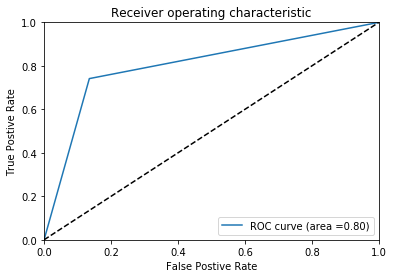

In [30]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("svm_linear_roc")

In [31]:
from sklearn.svm import SVC

clf_SVM_Df1=SVC(kernel='rbf', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df1.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [32]:
test0 = time.time()
Y_Df_pred=clf_SVM_Df1.predict(X_Df_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,8836,875
1,4164,8669


In [33]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Df_test, Y_Df_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[8836  875]
 [4164 8669]]
....
FP [4164.  875.]
FN [ 875. 4164.]
TP [8836. 8669.]
TN [8669. 8836.]
TPR [0.90989599 0.67552404]
TNR [0.67552404 0.90989599]
PPV [0.67969231 0.90831936]
FPR [0.32447596 0.09010401]
FNR [0.09010401 0.32447596]
FDR [0.32030769 0.09168064]
ACC [0.77648155 0.77648155]


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Df1, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.96842 (+/- 0.00722)
Precision: 0.95891 (+/- 0.00982)
Recall: 0.98683 (+/- 0.00625)
F-measure: 0.97266 (+/- 0.00618)
train_time:225.514s

test_time:19.101s



In [35]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Df_test, Y_Df_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.7927100169093938
Threshold: %f [2 1 0]
FPR: %f [0.         0.09010401 1.        ]
TPR: %f [0.         0.67552404 1.        ]


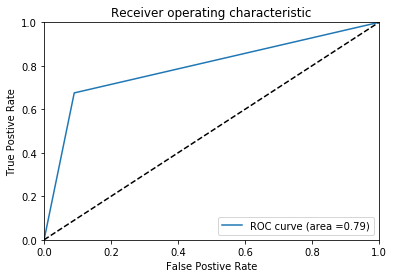

In [36]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("svm_rbf_roc")

In [37]:
from sklearn.svm import SVC

clf_SVM_Df2=SVC(kernel='poly', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df2.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [38]:
test0 = time.time()
Y_Df_pred=clf_SVM_Df2.predict(X_Df_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9407,304
1,8911,3922


In [39]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Df_test, Y_Df_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[9407  304]
 [8911 3922]]
....
FP [8911.  304.]
FN [ 304. 8911.]
TP [9407. 3922.]
TN [3922. 9407.]
TPR [0.96869529 0.30561833]
TNR [0.30561833 0.96869529]
PPV [0.5135386  0.92806436]
FPR [0.69438167 0.03130471]
FNR [0.03130471 0.69438167]
FDR [0.4864614  0.07193564]
ACC [0.59124379 0.59124379]


In [40]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Df2, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.95103 (+/- 0.00651)
Precision: 0.96023 (+/- 0.00515)
Recall: 0.95348 (+/- 0.01265)
F-measure: 0.95683 (+/- 0.00600)
train_time:232.611s

test_time:27.707s



In [41]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Df_test, Y_Df_pred)
roc_auc = auc(fpr, tpr)
print(("Area under the ROC curve: %f", roc_auc))
print(("Threshold: %f", thresholds))
print(("FPR: %f", fpr))
print(("TPR: %f", tpr))

('Area under the ROC curve: %f', 0.6371568108726358)
('Threshold: %f', array([2, 1, 0]))
('FPR: %f', array([0.        , 0.03130471, 1.        ]))
('TPR: %f', array([0.        , 0.30561833, 1.        ]))


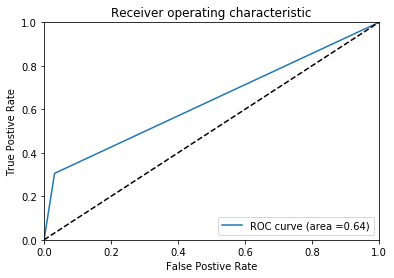

In [42]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("svm_poly_roc")

In [43]:
from sklearn.svm import SVC

clf_SVM_Df3=SVC(kernel='sigmoid', C=1.0, random_state=0)
train0 = time.time()
clf_SVM_Df3.fit(X_Df, Y_Df.astype(int))
train1 = time.time() - train0

In [44]:
test0 = time.time()
Y_Df_pred=clf_SVM_Df3.predict(X_Df_test)
test1 = time.time() - test0

# Create confusion matrix
pd.crosstab(Y_Df_test, Y_Df_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,6327,3384
1,3445,9388


In [45]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(Y_Df_test, Y_Df_pred)

print('Confusion_matrix')
print(cnf_matrix)
print('....')

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP+FN+TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

print('FP', FP)
print('FN', FN)
print('TP', TP)
print('TN', TN)
print('TPR', TPR)
print('TNR', TNR)
print('PPV', PPV)
print('FPR', FPR)
print('FNR', FNR)
print('FDR', FDR)
print('ACC', ACC)

Confusion_matrix
[[6327 3384]
 [3445 9388]]
....
FP [3445. 3384.]
FN [3384. 3445.]
TP [6327. 9388.]
TN [9388. 6327.]
TPR [0.65152919 0.73155147]
TNR [0.73155147 0.65152919]
PPV [0.64746214 0.73504541]
FPR [0.26844853 0.34847081]
FNR [0.34847081 0.26844853]
FDR [0.35253786 0.26495459]
ACC [0.69708126 0.69708126]


In [46]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
accuracy = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))
precision = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='precision')
print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
recall = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='recall')
print("Recall: %0.5f (+/- %0.5f)" % (recall.mean(), recall.std() * 2))
f = cross_val_score(clf_SVM_Df3, X_Df_test, Y_Df_test, cv=10, scoring='f1')
print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
print("train_time:%.3fs\n" %train1)
print("test_time:%.3fs\n" %test1)

Accuracy: 0.93914 (+/- 0.01070)
Precision: 0.93035 (+/- 0.01158)
Recall: 0.96540 (+/- 0.01425)
F-measure: 0.94753 (+/- 0.00932)
train_time:429.138s

test_time:43.007s



In [47]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_Df_test, Y_Df_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve: %f", roc_auc)
print("Threshold: %f", thresholds)
print("FPR: %f", fpr)
print("TPR: %f", tpr)

Area under the ROC curve: %f 0.6915403312835949
Threshold: %f [2 1 0]
FPR: %f [0.         0.34847081 1.        ]
TPR: %f [0.         0.73155147 1.        ]


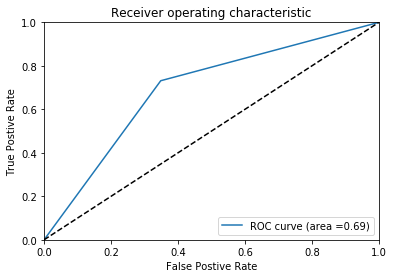

In [48]:
import pylab as pl

pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area =%0.2f)'% roc_auc)
pl.plot([0,1],[0,1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Postive Rate')
pl.ylabel('True Postive Rate')
pl.title('Receiver operating characteristic')
pl.legend(loc="lower right")
pl.savefig("svm_sigmoid_roc")